# Perturbation Tracers

We measure tracers of the (tidal) perturbations on each OC, spatial and dynamical.

- Compression along X,Y and Z
- Virial proxy
- velocity dispersion markers
- "halo" excess (tidal loss)
- TBD

In [85]:
using PyCall
using Statistics , MultivariateStats
import PyPlot , CSV

sns= pyimport("seaborn")

rootdir = ENV["GAIA_ROOT"]
push!(LOAD_PATH,"$rootdir/master/src")
using GaiaClustering

## directory
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/plots"
ocdir= "$wdir/oc2"

cd(wdir)

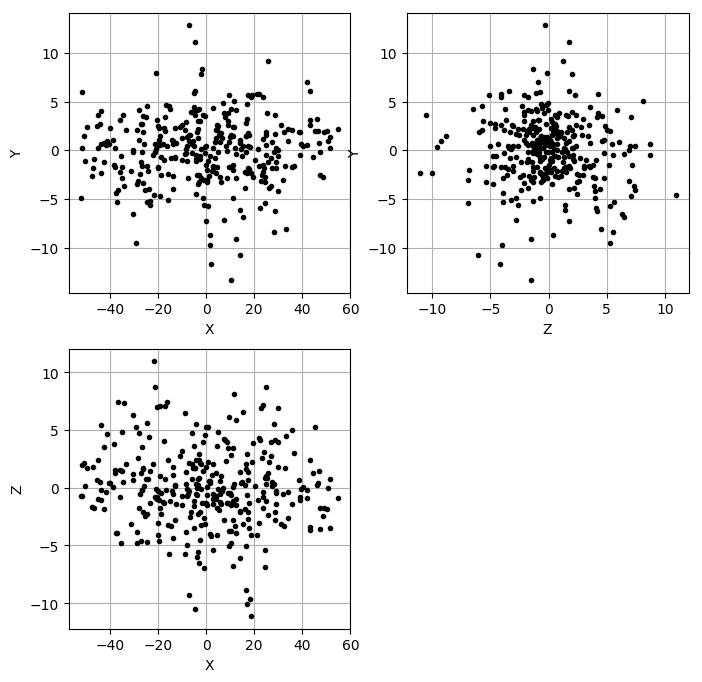

In [86]:
## Reading the test OC

ocname= "$ocdir/NGC 6025-1.7deg-oc.csv"
oc= CSV.read(ocname, delim= ";")

## OC recentered
oc.X= oc.X .- mean(oc.X)
oc.Y= oc.Y .- mean(oc.Y)
oc.Z= oc.Z .- mean(oc.Z)

fig= PyPlot.figure(figsize=(8,8))

ax= PyPlot.subplot(221)
PyPlot.grid("on")
PyPlot.plot(oc.X, oc.Y,"k.")
PyPlot.xlabel("X") ; PyPlot.ylabel("Y")
ax= PyPlot.subplot(222)
PyPlot.grid("on")
PyPlot.plot(oc.Z, oc.Y,"k.")
PyPlot.xlabel("Z") ; PyPlot.ylabel("Y")
ax= PyPlot.subplot(223)
PyPlot.grid("on")
PyPlot.plot(oc.X, oc.Z,"k.")
PyPlot.xlabel("X") ; PyPlot.ylabel("Z")

PyPlot.show()

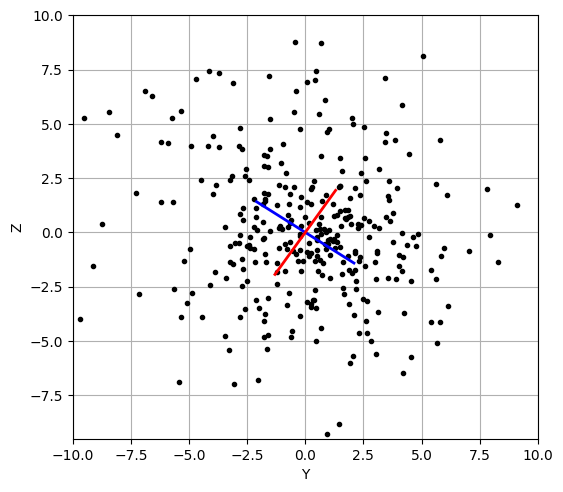

## Using PCA on XYZ to estimate the ellipsoid shape
##
[-0.9999205539013077 0.010348255777752335 0.007197186120974197; -0.004558510742749933 -0.8292058417155915 0.558924764207622; 0.011751845195966521 0.5588475513653933 0.8291871371815859]
[24.60913623780867, 3.5705302079871766, 3.2997414875727995]
## Axis ratio with PC[3]
[7.457898241571185, 1.0820636166300295, 1.0]


In [87]:
data= convert(Matrix, oc[:,8:10])

println("## Using PCA on XYZ to estimate the ellipsoid shape")
println("##")

M = fit(PCA, data')
## dump(M)
prat= principalratio(M)

pvars= principalvars(M)
pdisp= sqrt.(pvars)
proj= projection(M)
println(proj)
println(pdisp)
## Axis ratio
println("## Axis ratio with PC[3]")
println(sqrt.(pvars)./sqrt(pvars[3]))

x1= proj[2,2] ; y1= proj[2,3]
x2= proj[3,2] ; y2= proj[3,3]


x1d= x1 * pdisp[2] / sqrt(2*(x1^2 + y1^2)) ; y1d= y1 * pdisp[2] / sqrt(2*(x1^2 + y1^2))
x2d= x2 * pdisp[3] / sqrt(2*(x2^2 + y2^2)) ; y2d= y2 * pdisp[3] / sqrt(2*(x2^2 + y2^2))

fig= PyPlot.figure(figsize=(6,5.5))
ax= PyPlot.subplot(111)
PyPlot.xlim(-10,10) ; PyPlot.ylim(-9.5,10) ;
PyPlot.grid("on")
PyPlot.plot(oc.Y, oc.Z,"k.",  lw=0.1)
PyPlot.plot((-x1d,x1d),(-y1d,y1d),"b-", lw=2)
PyPlot.plot((-x2d,x2d),(-y2d,y2d),"r-", lw=2)

PyPlot.xlabel("Y") ; PyPlot.ylabel("Z")
PyPlot.show()